# Child Labour Statistics Analysis

In [1]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import csv
import warnings

warnings.filterwarnings('ignore')

## Dataset Overview

In [2]:
#Reading the dataset

df = pd.read_csv(r'D:\DA notes to study\child_labor_statistics.csv')

The following section provides an overview of the dataset structure, data types, and summary statistics.

In [3]:
df.shape

(537, 8)

In [4]:
#First five rows of data

df.head()

,Country,Country_Code,Region,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions,Gender,Age_Group
0,Afghanistan,AFG,Middle East and North Africa,2011,9.30,4.65,Total,7-14 years
1,Albania,ALB,Other,2010,5.50,2.75,Total,7-14 years
2,Algeria,DZA,Other,2013,7.50,3.75,Total,7-14 years
3,Argentina,ARG,Other,2012,5.03,2.51,Total,7-14 years
4,Armenia,ARM,Other,2010,9.90,4.95,Total,7-14 years


In [5]:
#Last five rows of data

df.tail()

,Country,Country_Code,Region,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions,Gender,Age_Group
532,World,WORLD,Global,2008,6.08,92.0,Girls,5-17 years
533,World,WORLD,Global,2000,16.00,246.0,Total,5-17 years
534,World,WORLD,Global,2000,11.12,171.0,Total,5-17 years
535,World,WORLD,Global,2000,9.43,145.0,Boys,5-17 years
536,World,WORLD,Global,2000,6.57,101.0,Girls,5-17 years


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      537 non-null    object 
 1   Country_Code                 537 non-null    object 
 2   Region                       537 non-null    object 
 3   Year                         537 non-null    int64  
 4   Child_Labor_Rate_Percent     537 non-null    float64
 5   Estimated_Children_Millions  537 non-null    float64
 6   Gender                       537 non-null    object 
 7   Age_Group                    537 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.7+ KB


In [7]:
df.describe()

,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions
count,537.000000,537.000000,537.000000
mean,2016.109870,18.474376,12.571676
std,5.640095,15.275823,25.765602
min,2000.000000,0.400000,0.200000
25%,2011.000000,5.560000,2.100000
50%,2014.000000,13.200000,4.650000
75%,2023.000000,28.500000,12.800000
max,2024.000000,65.350000,246.000000


## Data Quality Checks

In [8]:
df.isna().sum()

Country                        0
Country_Code                   0
Region                         0
Year                           0
Child_Labor_Rate_Percent       0
Estimated_Children_Millions    0
Gender                         0
Age_Group                      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
dup_rows = df[df.duplicated(subset = ['Country','Year','Gender','Age_Group'], keep = False)]

dup_rows.sort_values(by = ['Country','Year','Gender','Age_Group']).head(10)

,Country,Country_Code,Region,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions,Gender,Age_Group
468,Afghanistan,AFG,Middle East and North Africa,2022,23.70,4.10,Total,5-17 years
469,Afghanistan,AFG,Middle East and North Africa,2022,28.90,2.87,Total,5-17 years
470,Afghanistan,AFG,Middle East and North Africa,2022,15.50,1.23,Total,5-17 years
473,Afghanistan,AFG,Middle East and North Africa,2022,10.50,1.82,Total,5-17 years
501,Asia and the Pacific,REGION,Asia and the Pacific,2024,3.10,28.00,Total,5-17 years
502,Asia and the Pacific,REGION,Asia and the Pacific,2024,1.11,10.00,Total,5-17 years
503,Asia and the Pacific,REGION,Asia and the Pacific,2024,4.50,19.60,Total,5-17 years
396,Bangladesh,BGD,Asia and the Pacific,2023,4.60,3.40,Total,5-17 years
397,Bangladesh,BGD,Asia and the Pacific,2023,6.20,2.38,Total,5-17 years
398,Bangladesh,BGD,Asia and the Pacific,2023,2.50,1.02,Total,5-17 years


In [11]:
dup_rows[dup_rows['Gender'] != 'Total'].shape[0]

0

In [12]:
df[(df['Child_Labor_Rate_Percent'] < 0) | (df['Child_Labor_Rate_Percent'] > 100)].shape[0]

0

In [13]:
df[df['Estimated_Children_Millions'] < 0].shape[0]

0

- No missing values were identified across all columns.
- No fully duplicated records were found. Repeated Country–Year–Gender–Age Group combinations reflect multiple valid statistical estimates rather than data duplication.
- All percentage values fall within valid ranges (0–100).
- Estimated child labor counts are non-negative.

## Data Understanding & Assumptions

The following assumptions guide the interpretation and analysis of the dataset:

1. **Nature of the Dataset**  
   This dataset represents survey-based and model-derived estimates of child labor rather than transactional records.  
   Each row corresponds to a statistical estimate within a specific analytical context.

2. **Gender Interpretation**  
   Gender categories (Male, Female, Total) represent independent prevalence estimates calculated using different population denominators.  
   Male and Female values are not expected to sum to Total and are treated as comparative categories rather than additive components.

3. **Multiple Estimates per Country-Year**  
   Multiple records may exist for the same Country–Year–Age Group–Gender ("Total") combination.  
   These reflect alternative statistical estimates arising from differing methodologies, revisions, or classification context rather than data duplication.

4. **Rate vs Volume Metrics**  
   Child labor percentage values indicate prevalence within a population group, while estimated children (in millions) represent absolute volumes.  
   These metrics are analyzed separately due to differences in population size and are not directly aggregated together.

5. **Temporal Coverage Variability**  
   Data availability varies across countries and years.  
   Time-based analyses account for this variability through the use of aggregation windows or latest-available-year logic.

6. **Age Group Handling**  
   Age groups are analyzed independently and are not aggregated, as age bands represent distinct survey groupings.

7. **Retention of Extreme Values**  
   Extreme values are retained, as they are likely reflective of genuine socioeconomic conditions rather than data quality issues.

## Analytical Questions & Exploratory Analysis

### Q1. How has child labour prevalence changed over time across regions?

In [14]:
df1 = df[df['Gender'] == 'Total']

df1

,Country,Country_Code,Region,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions,Gender,Age_Group
0,Afghanistan,AFG,Middle East and North Africa,2011,9.30,4.65,Total,7-14 years
1,Albania,ALB,Other,2010,5.50,2.75,Total,7-14 years
2,Algeria,DZA,Other,2013,7.50,3.75,Total,7-14 years
3,Argentina,ARG,Other,2012,5.03,2.51,Total,7-14 years
4,Armenia,ARM,Other,2010,9.90,4.95,Total,7-14 years
...,...,...,...,...,...,...,...,...
526,World,WORLD,Global,2012,5.36,85.00,Total,5-17 years
529,World,WORLD,Global,2008,14.20,215.00,Total,5-17 years
530,World,WORLD,Global,2008,7.60,115.00,Total,5-17 years
533,World,WORLD,Global,2000,16.00,246.00,Total,5-17 years


In [15]:
df1['Year_Bin_Start'] = (df1['Year']//5) *5
df1['Year_Bin'] = df1['Year_Bin_Start'].astype(str) + '-' + (df1['Year_Bin_Start']+4).astype(str)
df1

,Country,Country_Code,Region,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions,Gender,Age_Group,Year_Bin_Start,Year_Bin
0,Afghanistan,AFG,Middle East and North Africa,2011,9.30,4.65,Total,7-14 years,2010,2010-2014
1,Albania,ALB,Other,2010,5.50,2.75,Total,7-14 years,2010,2010-2014
2,Algeria,DZA,Other,2013,7.50,3.75,Total,7-14 years,2010,2010-2014
3,Argentina,ARG,Other,2012,5.03,2.51,Total,7-14 years,2010,2010-2014
4,Armenia,ARM,Other,2010,9.90,4.95,Total,7-14 years,2010,2010-2014
...,...,...,...,...,...,...,...,...,...,...
526,World,WORLD,Global,2012,5.36,85.00,Total,5-17 years,2010,2010-2014
529,World,WORLD,Global,2008,14.20,215.00,Total,5-17 years,2005,2005-2009
530,World,WORLD,Global,2008,7.60,115.00,Total,5-17 years,2005,2005-2009
533,World,WORLD,Global,2000,16.00,246.00,Total,5-17 years,2000,2000-2004


In [16]:
df1[['Year','Year_Bin']].drop_duplicates().sort_values('Year').head(15)

,Year,Year_Bin
533,2000,2000-2004
529,2008,2005-2009
1,2010,2010-2014
0,2011,2010-2014
3,2012,2010-2014
2,2013,2010-2014
11,2014,2010-2014
8,2015,2015-2019
28,2016,2015-2019
517,2020,2020-2024


In [17]:
region_trend = df1.groupby(['Region','Year_Bin'], as_index = False).agg({'Child_Labor_Rate_Percent':'mean'})
region_trend['Child_Labor_Rate_Percent'] = region_trend['Child_Labor_Rate_Percent'].round(2)
region_trend

,Region,Year_Bin,Child_Labor_Rate_Percent
0,Asia and the Pacific,2010-2014,7.35
1,Asia and the Pacific,2020-2024,7.08
2,Europe and Central Asia,2020-2024,3.69
3,Global,2000-2004,13.56
4,Global,2005-2009,10.90
5,Global,2010-2014,7.98
6,Global,2015-2019,7.10
7,Global,2020-2024,6.30
8,Latin America and Caribbean,2010-2014,10.93
9,Latin America and Caribbean,2015-2019,13.01


Child labor rates are rounded to two decimal places for presentation purposes.

In [18]:
highest_region_per_bin = region_trend.sort_values(['Year_Bin','Child_Labor_Rate_Percent'], ascending = [True,False]).groupby(['Year_Bin'], as_index = False).head(1)
highest_region_per_bin

,Region,Year_Bin,Child_Labor_Rate_Percent
3,Global,2000-2004,13.56
4,Global,2005-2009,10.90
15,Sub-Saharan Africa,2010-2014,32.17
14,Other,2015-2019,19.40
16,Sub-Saharan Africa,2020-2024,27.81


Regions are ranked based on mean child labor prevalence (%) rather than absolute counts to ensure comparability across populations.

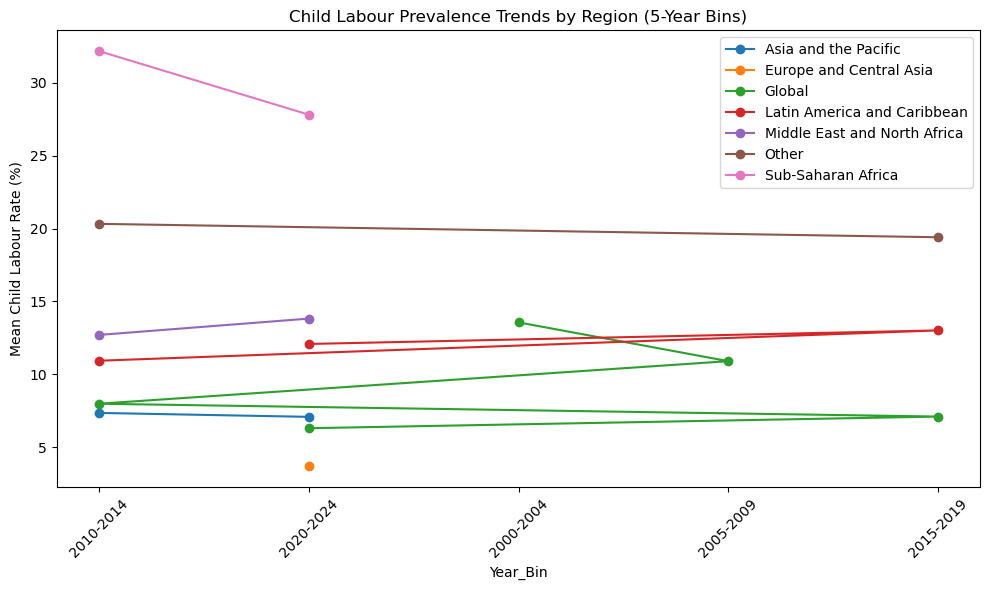

In [19]:
plt.figure(figsize = (10,6))

for r in region_trend['Region'].unique():
    subset = region_trend[region_trend['Region'] == r]
    plt.plot(subset['Year_Bin'], subset['Child_Labor_Rate_Percent'], marker = 'o', label = r)
    
plt.xlabel('Year_Bin')
plt.ylabel('Mean Child Labour Rate (%)')
plt.title("Child Labour Prevalence Trends by Region (5-Year Bins)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Key Observations:**

- Child labor prevalence varies significantly across regions, with certain regions consistently exhibiting higher rates across multiple 5-year periods.
- Regional trends show gradual changes over time rather than abrupt fluctuations, indicating structural socioeconomic patterns rather than short-term anomalies.
- Aggregating data into 5-year time windows helps smooth year-to-year variability and enables more stable regional comparisons.

**Note:**  
The Python visualization is used for exploratory validation of regional trends. Final interactive and presentation-ready visualizations are developed in Tableau.

### Q2: Which countries contribute the most to child labor within each age group?

**Approach:**  
To identify countries contributing the largest number of child laborers within each age group, only records with Gender = "Total" were used. Gender-disaggregated analysis is explored separately to avoid conflating magnitude-based rankings with participation disparities.
The latest available year per country and age group has been used to ensure comparability without aggregating estimates across time.

In [20]:
df2 = df[df['Gender'] == 'Total'].copy()

exclude_entities = [
    'World',
    'Sub-Saharan Africa',
    'Asia and the Pacific',
    'Europe and Central Asia',
    'Latin America and the Caribbean',
    'Middle East and North Africa',
    'Other'
]

df2 = df2[~df2['Country'].isin(exclude_entities)]

df2

,Country,Country_Code,Region,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions,Gender,Age_Group
0,Afghanistan,AFG,Middle East and North Africa,2011,9.30,4.65,Total,7-14 years
1,Albania,ALB,Other,2010,5.50,2.75,Total,7-14 years
2,Algeria,DZA,Other,2013,7.50,3.75,Total,7-14 years
3,Argentina,ARG,Other,2012,5.03,2.51,Total,7-14 years
4,Armenia,ARM,Other,2010,9.90,4.95,Total,7-14 years
...,...,...,...,...,...,...,...,...
494,Madagascar,MDG,Sub-Saharan Africa,2023,16.80,1.17,Total,5-17 years
497,Madagascar,MDG,Sub-Saharan Africa,2023,13.20,1.84,Total,5-17 years
504,Latin America and Caribbean,REGION,Latin America and Caribbean,2024,7.10,11.00,Total,5-17 years
505,Latin America and Caribbean,REGION,Latin America and Caribbean,2024,2.58,4.00,Total,5-17 years


In [21]:
latest_year_df = df2.sort_values(by = ['Year']).groupby(['Country','Age_Group'], as_index = False).tail(1)
latest_year_df

,Country,Country_Code,Region,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions,Gender,Age_Group
14,Burkina Faso,BFA,Sub-Saharan Africa,2010,50.3,25.15,Total,7-14 years
38,Eswatini,SWZ,Other,2010,13.3,6.65,Total,7-14 years
18,Central African Republic,CAF,Other,2010,37.2,18.60,Total,7-14 years
15,Burundi,BDI,Other,2010,31.9,15.95,Total,7-14 years
61,Liberia,LBR,Other,2010,18.4,9.20,Total,7-14 years
...,...,...,...,...,...,...,...,...
335,Ethiopia,ETH,Sub-Saharan Africa,2024,18.5,8.05,Total,5-17 years
347,Mali,MLI,Sub-Saharan Africa,2024,28.4,2.60,Total,5-17 years
385,India,IND,Asia and the Pacific,2024,5.8,7.07,Total,5-17 years
337,Democratic Republic of Congo,COD,Sub-Saharan Africa,2024,49.8,11.34,Total,5-17 years


In [22]:
top_countries_by_age = latest_year_df.sort_values(by = ['Age_Group','Estimated_Children_Millions'], ascending = [True, False]).groupby('Age_Group').head(5)
top_countries_by_age

,Country,Country_Code,Region,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions,Gender,Age_Group
337,Democratic Republic of Congo,COD,Sub-Saharan Africa,2024,49.80,11.34,Total,5-17 years
329,Nigeria,NGA,Sub-Saharan Africa,2024,15.20,10.69,Total,5-17 years
402,Indonesia,IDN,Asia and the Pacific,2023,6.90,8.80,Total,5-17 years
390,Pakistan,PAK,Asia and the Pacific,2023,12.50,8.40,Total,5-17 years
335,Ethiopia,ETH,Sub-Saharan Africa,2024,18.50,8.05,Total,5-17 years
48,Guinea-Bissau,GNB,Other,2014,63.92,31.96,Total,7-14 years
17,Cameroon,CMR,Other,2011,62.00,31.00,Total,7-14 years
94,Sierra Leone,SLE,Other,2013,59.20,29.60,Total,7-14 years
19,Chad,TCD,Other,2015,55.90,27.95,Total,7-14 years
14,Burkina Faso,BFA,Sub-Saharan Africa,2010,50.30,25.15,Total,7-14 years


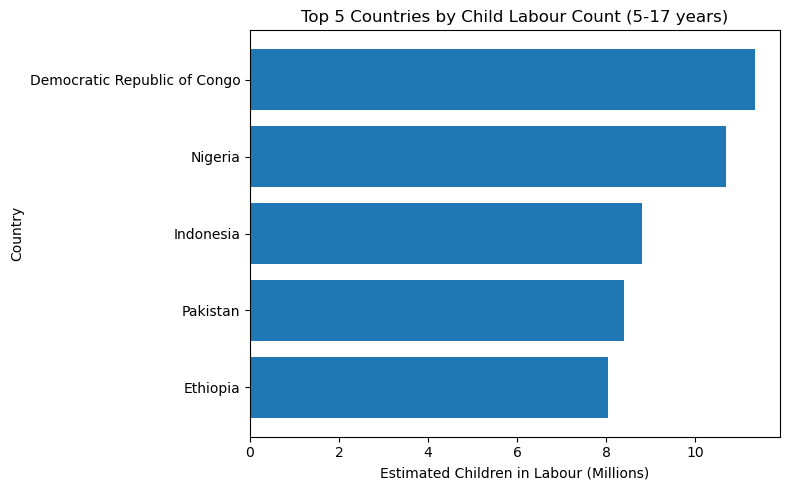

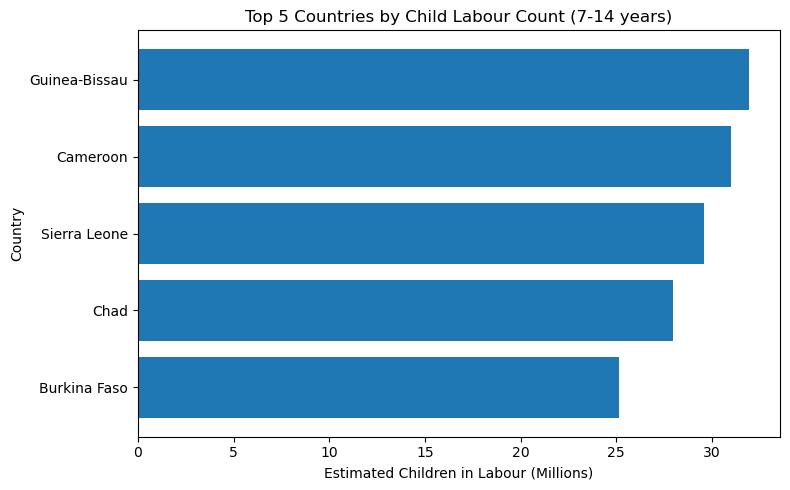

In [23]:
age_groups = top_countries_by_age['Age_Group'].unique()

for a in age_groups:
    subset = top_countries_by_age[top_countries_by_age['Age_Group'] == a]
    plt.figure(figsize = (8,5))
    plt.barh(subset['Country'], subset['Estimated_Children_Millions'])
    plt.xlabel("Estimated Children in Labour (Millions)")
    plt.ylabel("Country")
    plt.title(f"Top 5 Countries by Child Labour Count ({a})")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

### Q3. How does child labour participation differ between boys and girls across countries?

**Approach:**  
This analysis examines gender disparities in child labour participation using child labor prevalence rates (%).  
Only Male and Female records are considered.  
For each country, the latest available year is selected to ensure comparability across countries.  
Gender disparity is measured using the male-to-female child labour rate ratio.

In [24]:
df3 = df[~df['Country'].isin(exclude_entities)]

df3 = df[(df['Gender'].isin(['Male','Female'])) & (df['Age_Group'] == '7-14 years')]
df3.head(10)

,Country,Country_Code,Region,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions,Gender,Age_Group
108,Afghanistan,AFG,Middle East and North Africa,2011,5.10,2.55,Female,7-14 years
109,Albania,ALB,Other,2010,4.60,2.30,Female,7-14 years
110,Algeria,DZA,Other,2013,6.49,3.24,Female,7-14 years
111,Argentina,ARG,Other,2012,3.49,1.74,Female,7-14 years
112,Armenia,ARM,Other,2010,7.50,3.75,Female,7-14 years
113,Bangladesh,BGD,Asia and the Pacific,2013,4.22,2.11,Female,7-14 years
114,Belarus,BLR,Other,2012,2.60,1.30,Female,7-14 years
115,Benin,BEN,Other,2012,23.70,11.85,Female,7-14 years
116,Bolivia,BOL,Latin America and Caribbean,2015,12.59,6.29,Female,7-14 years
117,Bolivia,BOL,Latin America and Caribbean,2013,20.52,10.26,Female,7-14 years


In [25]:
latest_year_df1 = df3.sort_values(by = ['Year']).groupby(['Country','Gender'], as_index = False).tail(1)
latest_year_df1.head(10)

,Country,Country_Code,Region,Year,Child_Labor_Rate_Percent,Estimated_Children_Millions,Gender,Age_Group
215,"Yemen, Rep.",YEM,Middle East and North Africa,2010,15.0,7.50,Female,7-14 years
163,Indonesia,IDN,Asia and the Pacific,2010,3.2,1.60,Female,7-14 years
168,Lao PDR,LAO,Other,2010,9.7,4.85,Female,7-14 years
169,Liberia,LBR,Other,2010,15.0,7.50,Female,7-14 years
217,Albania,ALB,Other,2010,6.4,3.20,Male,7-14 years
220,Armenia,ARM,Other,2010,12.0,6.00,Male,7-14 years
230,Burkina Faso,BFA,Sub-Saharan Africa,2010,55.6,27.80,Male,7-14 years
231,Burundi,BDI,Other,2010,31.3,15.65,Male,7-14 years
234,Central African Republic,CAF,Other,2010,36.6,18.30,Male,7-14 years
276,Lao PDR,LAO,Other,2010,7.6,3.80,Male,7-14 years


In [26]:
gender_pivot = latest_year_df1.pivot(index = 'Country', columns = 'Gender', values = 'Child_Labor_Rate_Percent').reset_index()
gender_pivot

Gender,Country,Female,Male
0,Afghanistan,5.10,13.10
1,Albania,4.60,6.40
2,Algeria,6.49,8.47
3,Argentina,3.49,6.39
4,Armenia,7.50,12.00
...,...,...,...
66,Uganda,36.30,37.10
67,Ukraine,5.00,5.10
68,"Venezuela, RB",2.39,5.37
69,Viet Nam,10.10,11.70


In [27]:
gender_pivot['Male_Female_Ratio'] = gender_pivot['Male']/gender_pivot['Female']
gender_pivot['Male_Female_Ratio'] = gender_pivot['Male_Female_Ratio'].round(2)
gender_pivot

Gender,Country,Female,Male,Male_Female_Ratio
0,Afghanistan,5.10,13.10,2.57
1,Albania,4.60,6.40,1.39
2,Algeria,6.49,8.47,1.31
3,Argentina,3.49,6.39,1.83
4,Armenia,7.50,12.00,1.60
...,...,...,...,...
66,Uganda,36.30,37.10,1.02
67,Ukraine,5.00,5.10,1.02
68,"Venezuela, RB",2.39,5.37,2.25
69,Viet Nam,10.10,11.70,1.16


In [28]:
top_gender_gap = gender_pivot.sort_values(by = ['Male_Female_Ratio'], ascending = False).head(10)
top_gender_gap

Gender,Country,Female,Male,Male_Female_Ratio
39,Jordan,0.40,2.01,5.02
55,Paraguay,4.74,15.70,3.31
20,Costa Rica,0.63,1.94,3.08
59,Senegal,13.05,37.26,2.86
34,Honduras,5.75,15.12,2.63
0,Afghanistan,5.10,13.10,2.57
24,El Salvador,4.57,10.95,2.40
30,Guatemala,4.25,10.04,2.36
9,Brazil,1.53,3.52,2.30
68,"Venezuela, RB",2.39,5.37,2.25


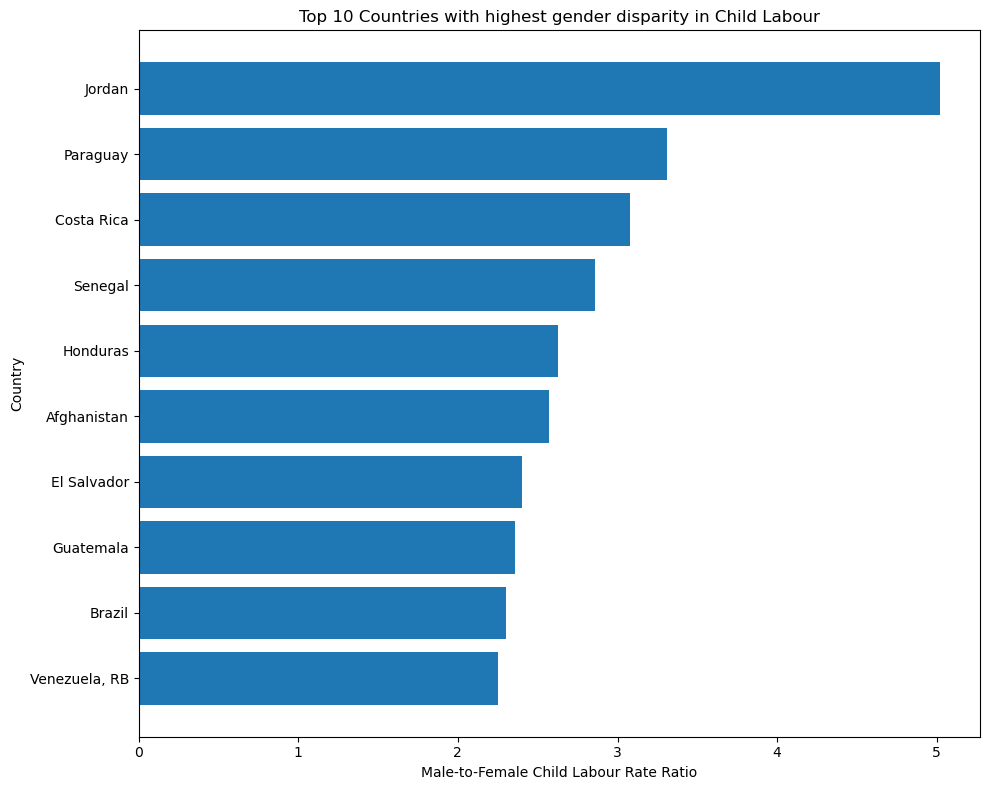

In [29]:
plt.figure(figsize = (10,8))
plt.barh(top_gender_gap['Country'], top_gender_gap['Male_Female_Ratio'])

plt.xlabel('Male-to-Female Child Labour Rate Ratio')
plt.ylabel('Country')
plt.title('Top 10 Countries with highest gender disparity in Child Labour')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [30]:
a = gender_pivot[gender_pivot['Male_Female_Ratio'] >= 1.0]
a

Gender,Country,Female,Male,Male_Female_Ratio
0,Afghanistan,5.10,13.10,2.57
1,Albania,4.60,6.40,1.39
2,Algeria,6.49,8.47,1.31
3,Argentina,3.49,6.39,1.83
4,Armenia,7.50,12.00,1.60
...,...,...,...,...
66,Uganda,36.30,37.10,1.02
67,Ukraine,5.00,5.10,1.02
68,"Venezuela, RB",2.39,5.37,2.25
69,Viet Nam,10.10,11.70,1.16


**Key Observations:**

- In most countries, child labor participation rates are higher for boys than for girls, as reflected by male-to-female ratios greater than one.
- Gender disparities vary significantly across countries, indicating that gender norms and labor participation patterns differ by context.
- Some countries exhibit relatively balanced participation, while others show pronounced gender gaps, highlighting areas where gender-specific interventions may be relevant.

**Note:**  
This analysis focuses on prevalence rates rather than absolute counts to isolate participation differences between boys and girls.

## Next Steps

The cleaned and aggregated datasets produced in this notebook are used to build interactive dashboards in Tableau.  
Further insights and storytelling are developed through visual exploration rather than additional statistical aggregation.

In [31]:
region_trend.to_csv('region_trend.csv', index = False)
top_countries_by_age.to_csv('top_countries_by_age.csv', index = False)
gender_pivot.to_csv('gender-gender-ratio.csv', index = False)

The aggregated datasets produced in this notebook have been exported and used as data sources for the interactive Tableau dashboards.